### Association Rules -- Market Basket Analysis

Market Basket Analysis 

To calculate the association rule using Apriori.


In [1]:
#Importing the Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

### EDA-- Pre-Processing
Using Transaction Encoder to generate a Logical Dataframe

In [3]:
te = TransactionEncoder()
te_try = te.fit(dataset).transform(dataset)

In [4]:
df = pd.DataFrame(te_try, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [5]:
# most popular items
count = df.loc[:,:].sum()
count

Apple           1
Corn            2
Dill            1
Eggs            4
Ice cream       1
Kidney Beans    5
Milk            3
Nutmeg          2
Onion           3
Unicorn         1
Yogurt          3
dtype: int64

In [6]:
# Top 10 Popular items
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

Kidney Beans    5
Eggs            4
Milk            3
Onion           3
Yogurt          3
Corn            2
Nutmeg          2
Apple           1
Dill            1
Ice cream       1
dtype: int64

In [7]:
pop_item = pop_item.to_frame().reset_index()
#Renaming the columns
pop_item = pop_item.rename(columns = {'index': 'items',0: 'count'})
pop_item

,items,count
0,Kidney Beans,5
1,Eggs,4
2,Milk,3
3,Onion,3
4,Yogurt,3
5,Corn,2
6,Nutmeg,2
7,Apple,1
8,Dill,1
9,Ice cream,1


<AxesSubplot:xlabel='count', ylabel='items'>

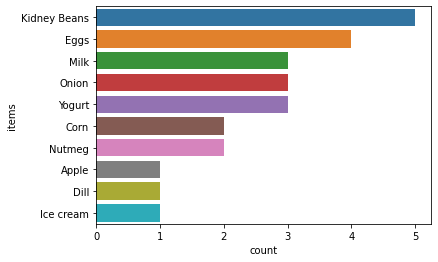

In [8]:
sns.barplot('count','items',data=pop_item)

### Apriori Algorithm 

In [9]:
# min_support -- Support Creterion = 0.6 = 60%
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [10]:
# min_threshold -- Lift Ratio > 0.9 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
5,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
8,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0


In [11]:
#Sorting The Rules.
rules.sort_values('lift',ascending = True)[0:16]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
4,(Kidney Beans),(Milk),1.0,0.6,0.6,0.60,1.00,0.00,1.0
5,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
8,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0
10,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
15,(Kidney Beans),"(Onion, Eggs)",1.0,0.6,0.6,0.60,1.00,0.00,1.0


In [12]:
# Fetching Rules which have Lift ratio great then 1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
11,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
12,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
13,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
14,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


Inference:

Eggs, Onion, and Kidney Beans are the Most Frequently brought item set.

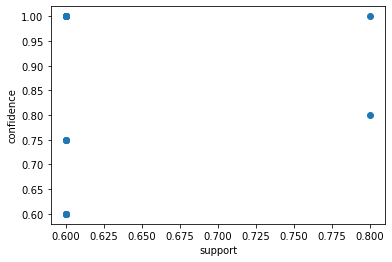

In [13]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()